

Juan Carlos Romero Domínguez A01658390




EcoBici Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io


df = pd.read_csv("2025-01.csv")
display(df.head(50))

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17
5,M,24.0,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58
6,M,31.0,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16
7,M,22.0,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41
8,M,29.0,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28
9,F,24.0,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31


In [5]:
df.count()

,0
Genero_Usuario,308401
Edad_Usuario,308368
Bici,308401
Ciclo_Estacion_Retiro,308401
Fecha_Retiro,308401
Hora_Retiro,308401
Ciclo_EstacionArribo,308401
Fecha_Arribo,308401
Hora_Arribo,308400


In [6]:
df.shape

(308401, 9)

In [7]:
print(df['Edad_Usuario'].min())

16.0


In [9]:
fila = df.iloc[57771]
print(fila)


Genero_Usuario                    M
Edad_Usuario                   25.0
Bici                        8927774
Ciclo_Estacion_Retiro           008
Fecha_Retiro             02/01/2025
Hora_Retiro                20:47:21
Ciclo_EstacionArribo        107-108
Fecha_Arribo             02/01/2025
Hora_Arribo                20:54:59
Name: 57771, dtype: object


In [10]:
ts_retiro = pd.to_datetime(df['Fecha_Retiro'].astype(str)+' '+df['Hora_Retiro'].astype(str),
                           errors='coerce', dayfirst=True)
ts_arribo = pd.to_datetime(df['Fecha_Arribo'].astype(str)+' '+df['Hora_Arribo'].astype(str),
                           errors='coerce', dayfirst=True)

dur_min = (ts_arribo - ts_retiro).dt.total_seconds() / 60

mask = dur_min.gt(45) & ts_arribo.ge(ts_retiro)

cols = ['Bici','Ciclo_Estacion_Retiro','Ciclo_EstacionArribo',
        'Fecha_Retiro','Hora_Retiro','Fecha_Arribo','Hora_Arribo']
viajes_mayor_45 = df.loc[mask, cols].copy()
viajes_mayor_45['dur_min'] = dur_min[mask].round(1)
viajes_mayor_45 = viajes_mayor_45.sort_values('dur_min', ascending=False)

print(f"Viajes > 45 min: {len(viajes_mayor_45):,}")
viajes_mayor_45.head(20)

Viajes > 45 min: 4,560


,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,Fecha_Retiro,Hora_Retiro,Fecha_Arribo,Hora_Arribo,dur_min
302663,4693214,106,190,03/01/2025,17:23:49,07/01/2025,23:22:41,6118.9
41178,2756401,302,1000,29/12/2024,19:06:09,02/01/2025,16:29:07,5603.0
75481,8189953,248,559,31/12/2024,15:18:43,03/01/2025,12:20:17,4141.6
62104,2218725,116,257,31/12/2024,09:24:35,03/01/2025,02:27:35,3903.0
26011,4672184,653,697,31/12/2024,18:16:11,02/01/2025,10:42:11,2426.0
20993,4861167,571,570,31/12/2024,20:04:34,02/01/2025,08:36:59,2192.4
89608,6707863,096,1000,02/01/2025,11:16:30,03/01/2025,16:34:32,1758.0
28011,2352755,237-238,456,01/01/2025,11:53:16,02/01/2025,11:50:09,1436.9
2632,8381493,231,233,31/12/2024,13:36:25,01/01/2025,12:00:32,1344.1
135589,6109169,138,138,03/01/2025,21:42:00,04/01/2025,17:50:55,1208.9


In [11]:
df['Es_Nino'] = df['Edad_Usuario'] < 18
df['Es_Adolescente'] = (df['Edad_Usuario'] >= 12) & (df['Edad_Usuario'] <= 17)
df['Es_Adulto'] = (df['Edad_Usuario'] >= 18) & (df['Edad_Usuario'] <= 59)
df['Es_Mayor'] = df['Edad_Usuario'] >= 60

display(df.head())

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Es_Nino,Es_Adolescente,Es_Adulto,Es_Mayor
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,False,False,True,False
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,False,False,True,False
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,False,False,True,False
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,False,False,True,False
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,False,False,True,False


In [12]:
df.count()

,0
Genero_Usuario,308401
Edad_Usuario,308368
Bici,308401
Ciclo_Estacion_Retiro,308401
Fecha_Retiro,308401
Hora_Retiro,308401
Ciclo_EstacionArribo,308401
Fecha_Arribo,308401
Hora_Arribo,308400
Es_Nino,308401


In [13]:
df['Es_Masculino'] = df['Genero_Usuario'] == 'M'
df['Es_Femenino'] = df['Genero_Usuario'] == 'F'
df['Es_Otro_Genero'] = ~df['Es_Masculino'] & ~df['Es_Femenino']

display(df.head())

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Es_Nino,Es_Adolescente,Es_Adulto,Es_Mayor,Es_Masculino,Es_Femenino,Es_Otro_Genero
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,False,False,True,False,True,False,False
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,False,False,True,False,False,True,False
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,False,False,True,False,True,False,False
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,False,False,True,False,True,False,False
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,False,False,True,False,True,False,False


In [14]:
display(df.head())
df.info()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Es_Nino,Es_Adolescente,Es_Adulto,Es_Mayor,Es_Masculino,Es_Femenino,Es_Otro_Genero
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,False,False,True,False,True,False,False
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,False,False,True,False,False,True,False
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,False,False,True,False,True,False,False
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,False,False,True,False,True,False,False
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,False,False,True,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308401 entries, 0 to 308400
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Genero_Usuario         308401 non-null  object 
 1   Edad_Usuario           308368 non-null  float64
 2   Bici                   308401 non-null  int64  
 3   Ciclo_Estacion_Retiro  308401 non-null  object 
 4   Fecha_Retiro           308401 non-null  object 
 5   Hora_Retiro            308401 non-null  object 
 6   Ciclo_EstacionArribo   308401 non-null  object 
 7   Fecha_Arribo           308401 non-null  object 
 8   Hora_Arribo            308400 non-null  object 
 9   Es_Nino                308401 non-null  bool   
 10  Es_Adolescente         308401 non-null  bool   
 11  Es_Adulto              308401 non-null  bool   
 12  Es_Mayor               308401 non-null  bool   
 13  Es_Masculino           308401 non-null  bool   
 14  Es_Femenino            308401 non-nu

In [15]:
print("La cantidad de gente mayor es: ", df[df["Es_Mayor"] == True]['Es_Mayor'].count())
print("La cantidad de niños es: ", df[df["Es_Nino"] == True]['Es_Nino'].count())
print("La cantidad de adultos es: ", df[df["Es_Adulto"] == True]['Es_Adulto'].count())
print("La cantidad de adolescentes es: ", df[df["Es_Adolescente"] == True]['Es_Adolescente'].count())

La cantidad de gente mayor es:  7300
La cantidad de niños es:  263
La cantidad de adultos es:  300805
La cantidad de adolescentes es:  263


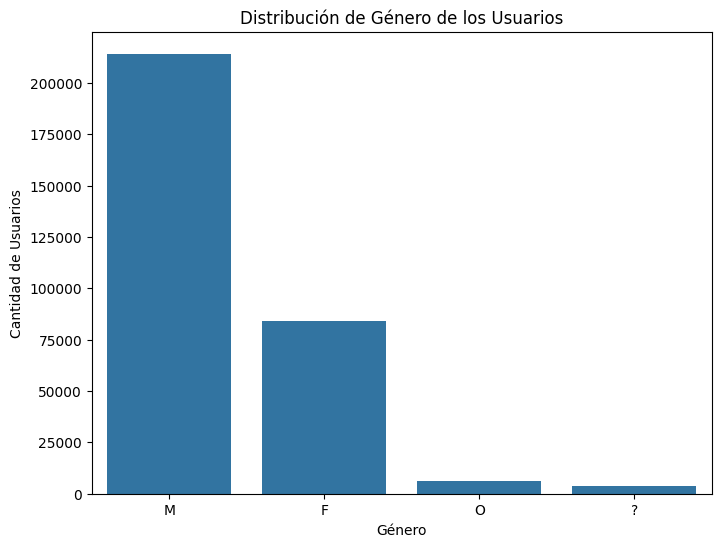

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Genero_Usuario', data=df)
plt.title('Distribución de Género de los Usuarios')
plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.show()